# Unsupervised Learning 
## Task: Clustering the Iris dataset

## 1. Import necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering # For Hierarchical clustering

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer # for sillouette plot
from scipy.cluster.hierarchy import linkage, dendrogram # to visualize the dendogram

from sklearn.decomposition import PCA

You may need install `yellowbrick` package, you can do it by uncomment the following cell :

In [14]:
#pip install yellowbrick

## 2. Load the Iris dataset

In [12]:
iris = datasets.load_iris()

## 3. Apply K-Means clustering

Let's assume we don't know there are three species, and we tell the algorithm to classify the data into two clusters.

In [13]:
kmeans_2 = KMeans(n_clusters=2, random_state = 0)
kmeans_2_clusters = kmeans_2.fit_predict(iris.data)
kmeans_2_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
pd.DataFrame(np.unique(kmeans_2_clusters, return_counts = True)[1], columns = ['N_observations'])

,N_observations
0,53
1,97


### 4. Find the optimal number of clusters

### 1. The Elbow Method

The Elbow Method is a technique used to help us find the optimal number of clusters for K-Means clustering. It's called "the elbow method" because the graph we use to find this number often resembles an arm with an elbow!

The optimal number of clusters is usually the one where the 'elbow' occurs in the plot, i.e., where the decrease in Inertia/WCSS starts to slow down.

**Inertia:** Inertia measures the sum of distances of all the points within a cluster from the centroid of that cluster. It's used to evaluate the clustering model. The smaller the inertia value, the better our clusters are because the distance from the centroid is small, which means similar points are grouped together.

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


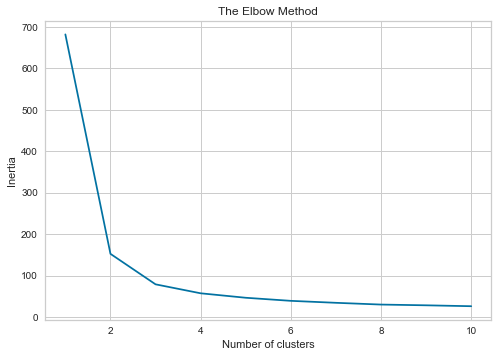

In [15]:
inertia = []  # inertia or Within-Cluster-Sum-of-Squares, lower values are better
for i in range(1, 11):  # Test with number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(iris.data)
    inertia.append(kmeans.inertia_)  # inertia_ is the WCSS for the current model

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Note:** the Elbow Method gives an indication of the possible good choices for K but doesn't guarantee the best K. It's a heuristic method, and in some cases, the "elbow" may not be very clear or may not even exist. In such cases, other methods or domain knowledge may be needed to choose a suitable K.

### 2. The Sillouette methode

The silhouette score is a measure of how close each sample in one cluster is to the samples in the neighboring clusters. It ranges from -1 to 1, and a higher value indicates that samples are well clustered.

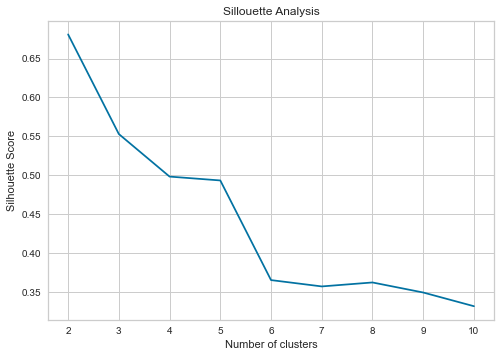

In [16]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(iris.data)
  labels = kmeans.labels_
  sil.append(silhouette_score(iris.data, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil)
plt.title('Sillouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here, the highest value of silouette score is for the k-means model with 2 clusters

#### Sillouette plot

- Sillouette plot of a kmeans with 2 cluster

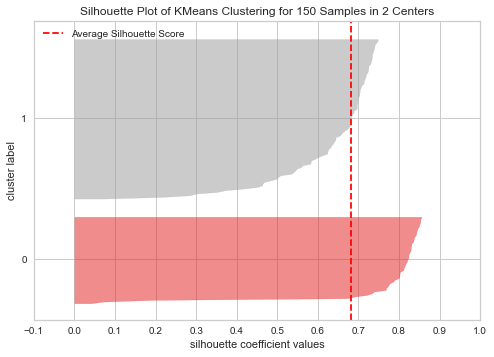

# of clusters: 2
Silhouette score 0.6810461692117462


In [17]:
silh = SilhouetteVisualizer(KMeans(2, random_state = 0))
silh.fit(iris.data)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a kmeans with 3 cluster

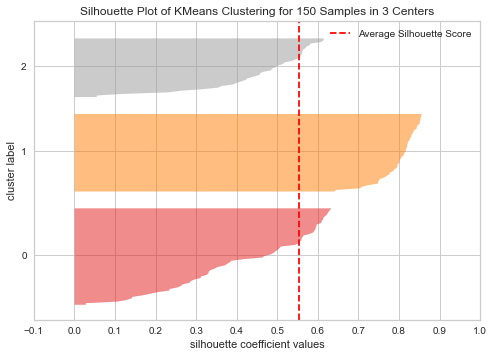

# of clusters: 3
Silhouette score 0.5528190123564102


In [8]:
silh = SilhouetteVisualizer(KMeans(3, random_state = 0))
silh.fit(iris.data)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a kmeans with 4 cluster

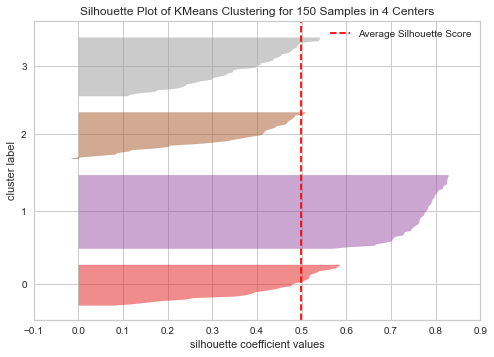

# of clusters: 4
Silhouette score 0.49805050499728803


In [9]:
silh = SilhouetteVisualizer(KMeans(4, random_state = 0))
silh.fit(iris.data)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

## 4. Visualize the KMeans clusters

In this part, We will use two features for simplicity to make a 2D plot.

We'll choose petal length and petal weight because thay show the clearest distinctions between species.

We'll see the data points colored according to their cluster, with the centroids of the clusters in golden.

### KMeans with 2 clusters

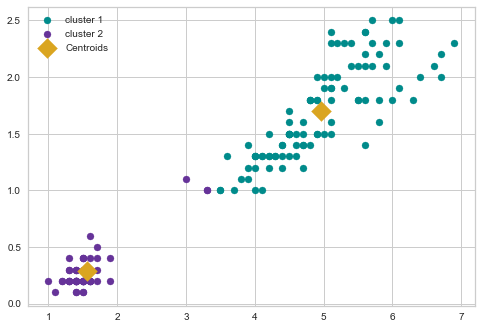

In [18]:
# Fit and make 2 clusters 
kmeans = KMeans(n_clusters=2)
kmeans_clusters = kmeans.fit_predict(iris.data)

# Visualize clusters
plt.scatter(iris.data[kmeans_clusters == 0, 2], iris.data[kmeans_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')
plt.scatter(iris.data[kmeans_clusters == 1, 2], iris.data[kmeans_clusters == 1, 3], 
            color='rebeccapurple', label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
plt.legend()
plt.show()

#### Comparison with the true spicies

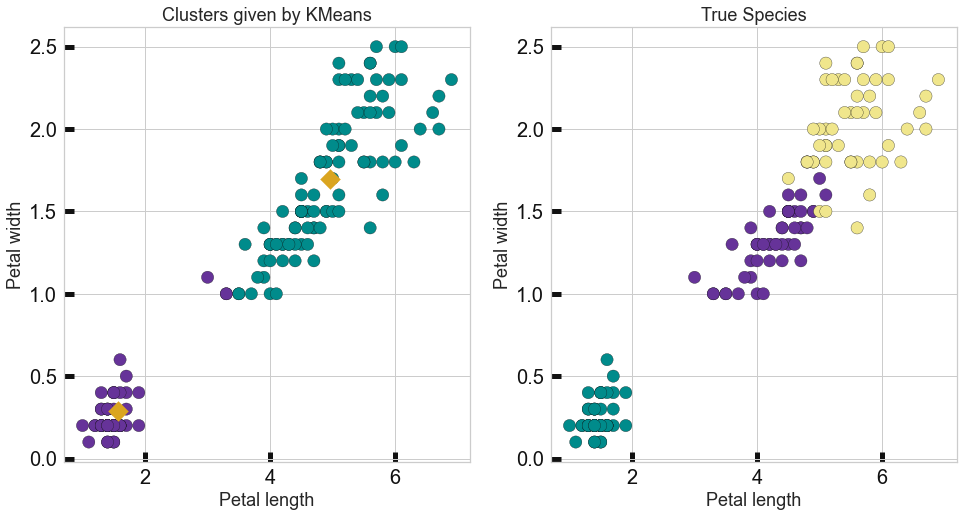

In [19]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(kmeans_clusters).map(colors),
            edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by KMeans', fontsize=18)
axes[0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
# This chunk of code creates a scatter plot of the data points, 
# colored by the predicted cluster from KMeans. The axes are labeled and the title of the graph is set.


# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

### KMeans with 3 clusters

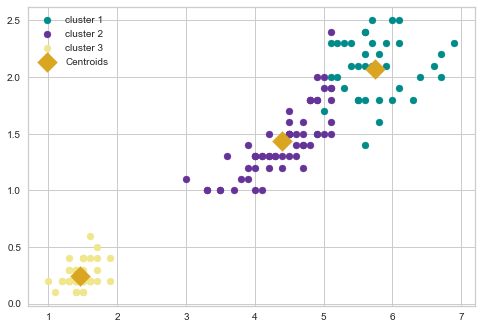

In [20]:
# Fit and make 3 clusters 
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(iris.data)

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Visualize clusters
plt.scatter(iris.data[kmeans_clusters == 0, 2], iris.data[kmeans_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')

plt.scatter(iris.data[kmeans_clusters == 1, 2], iris.data[kmeans_clusters == 1, 3], 
            color='rebeccapurple', label='cluster 2')

plt.scatter(iris.data[kmeans_clusters == 2, 2], iris.data[kmeans_clusters == 2, 3], 
            color='khaki', label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
plt.legend()
plt.show()

#### Comparison with the true spicies

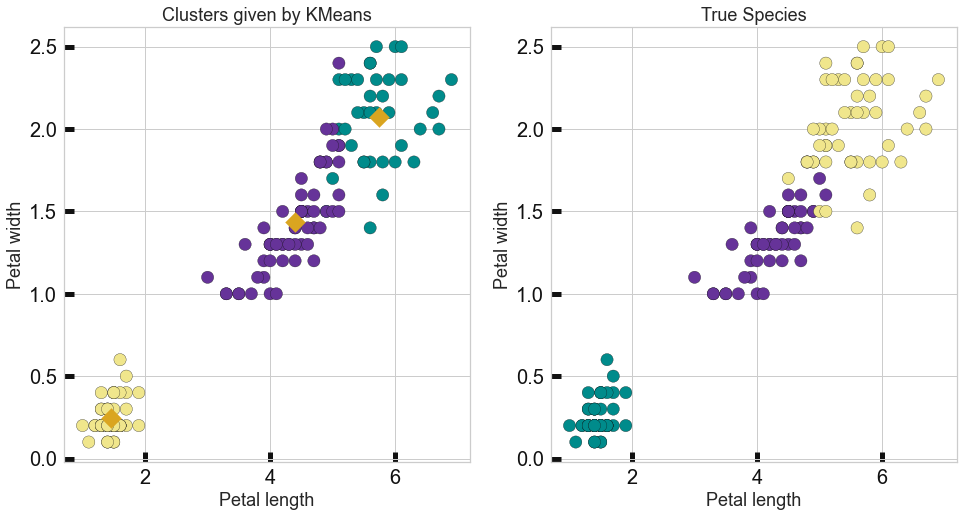

In [21]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(kmeans_clusters).map(colors),
            edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by KMeans', fontsize=18)
axes[0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
# This chunk of code creates a scatter plot of the data points, 
# colored by the predicted cluster from KMeans. The axes are labeled and the title of the graph is set.

# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

## 5. Apply Hierarchical Clustering

In [22]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo_clusters = agglo.fit_predict(iris.data)
print('Sillouette score:', silhouette_score(iris.data, agglo_clusters, metric = 'euclidean'))

Sillouette score: 0.6867350732769777


## 6. Visualize the Hierarchical clusters

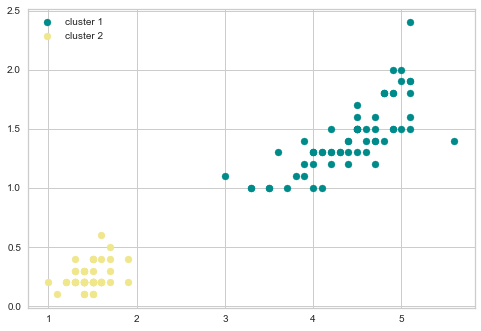

In [53]:
plt.scatter(iris.data[agglo_clusters == 0, 2], iris.data[agglo_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')
plt.scatter(iris.data[agglo_clusters == 1, 2], iris.data[agglo_clusters == 1, 3], 
            color='khaki', label='cluster 2')
plt.legend()
plt.show()

#### Comparison with the true spicies

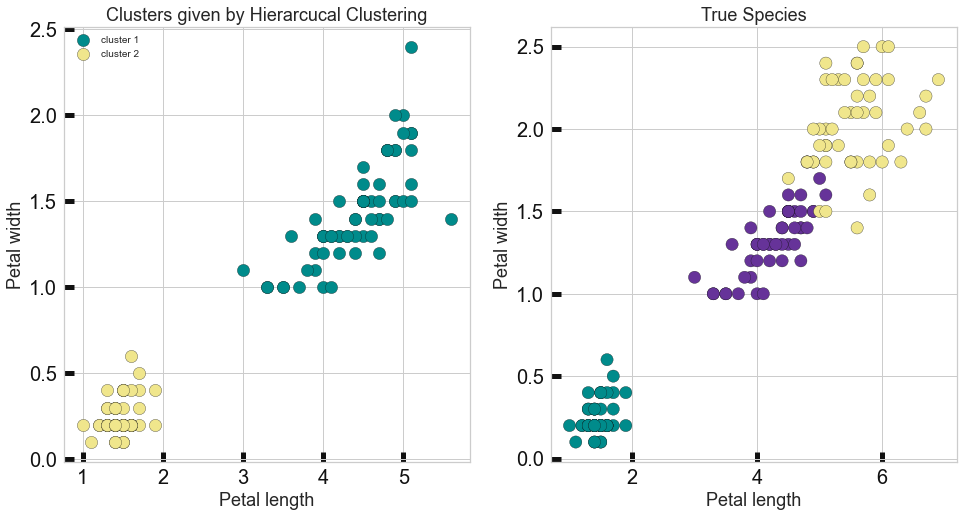

In [45]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(iris.data[agglo_clusters == 0, 2], iris.data[agglo_clusters == 0, 3], 
            color='darkcyan', label='cluster 1', edgecolor='k', s=150)
axes[0].scatter(iris.data[agglo_clusters == 1, 2], iris.data[agglo_clusters == 1, 3], 
            color='khaki', label='cluster 2', edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by Hierarcucal Clustering', fontsize=18)
axes[0].legend()

# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

- For 3 clusters

0.5543236611296419


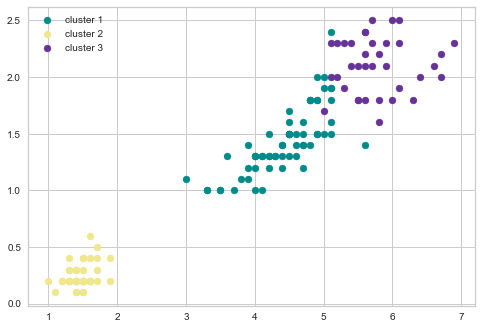

In [28]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_clusters = agglo.fit_predict(iris.data)

print(silhouette_score(iris.data, agglo_clusters, metric = 'euclidean'))

plt.scatter(iris.data[agglo_clusters == 0, 2], iris.data[agglo_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')
plt.scatter(iris.data[agglo_clusters == 1, 2], iris.data[agglo_clusters == 1, 3], 
            color='khaki', label='cluster 2')
plt.scatter(iris.data[agglo_clusters == 2, 2], iris.data[agglo_clusters == 2, 3], 
            color='rebeccapurple', label='cluster 3')

plt.legend()
plt.show()

#### Comparison with the true spicies

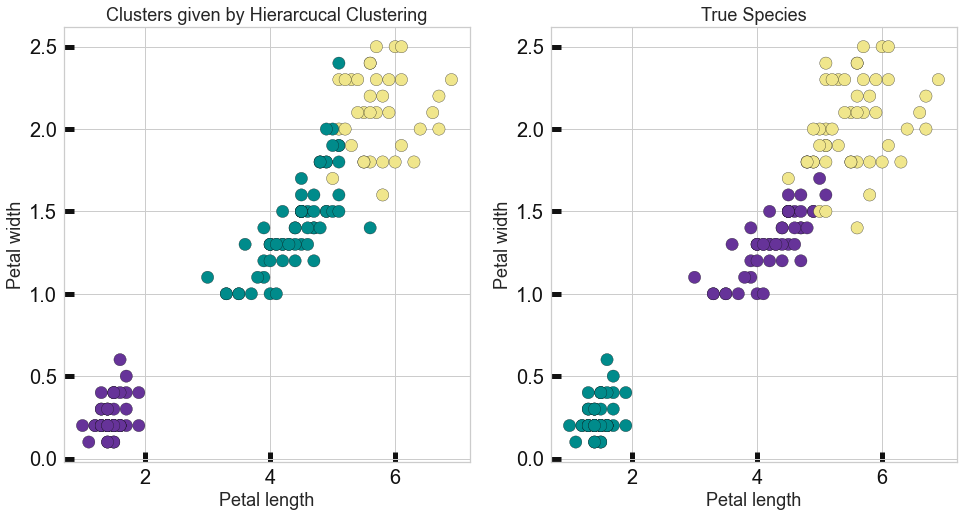

In [31]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot (in a differente way as the previous one, for inspiration)
axes[0].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(agglo_clusters).map(colors), edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by Hierarcucal Clustering', fontsize=18)


# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)

plt.show()

#### Visualize the dendogram

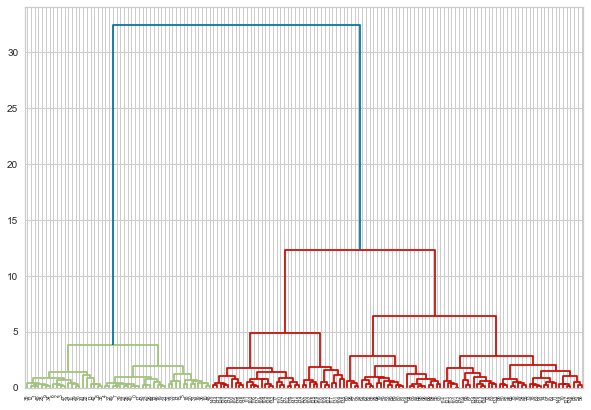

In [50]:
# Perform hierarchical clustering
Z = linkage(iris.data, method='ward')

# Create a dendrogram
fig = plt.figure(figsize=(10, 7))
dn = dendrogram(Z)

plt.show()

## Apply PCA

The process involves two steps: 
- First, you apply PCA with the total number of features to determine how many principal components are needed to explain a certain amount of variance. 
- Second, you perform PCA again using the desired number of components to transform your data.

The Iris dataset has 4 features, so we'll initially set n_components=4 in the PCA.

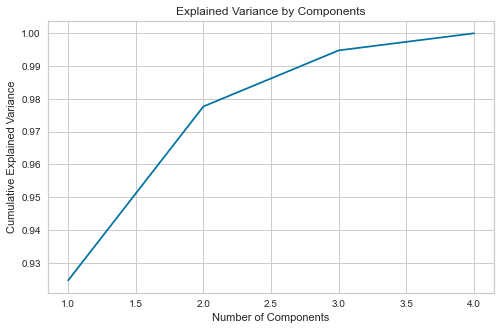

In [57]:
# Fit PCA to the data
pca = PCA(n_components=4)
pca.fit(iris.data)
# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In this plot, the x-axis shows the number of principal components, and the y-axis shows the cumulative explained variance. This helps you see how much of the variance in your data is explained by the first component, the first two components together, the first three components together, and so on.

A commonly used approach is to select the smallest number of principal components that explain a large proportion of the variance, typically around 95% or 99%. However, the exact threshold can vary depending on your specific use case.

In this case, the first 2 PCA explain almost 98% of the variance.

**Note:** that this is a simplified example using the Iris dataset, which only has 4 features. For larger, real-world datasets, the process would be similar, but you may have many more components to consider.

Now, we apply PCA again using 2 principal components

In [42]:
# Perform PCA with the chosen number of components : 2
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(iris.data)
# X_pca2 now contains your data transformed to the first 2 principal components.

The variable `X_pca` now holds the transformed data in the space of the first 2 principal components. 

#### Visualise the PCA 

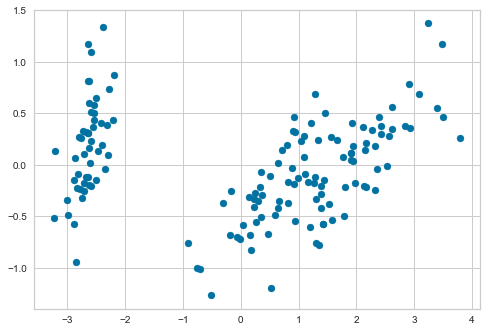

In [43]:
# Visualize the PC1 and PC2
plt.scatter(X_pca2[:,0], X_pca2[:,1])
plt.show()

This transformed data can be used for further analysis or modeling, and should hopefully retain most of the important information from the original features, while reducing the dimensionality of the dataset.

#### **Examples : Using PCA with other algorithm**

For example, we can apply the Decision Tree Classifier or KMeans Clustering to our chosen PCA instead of our features.

In this case, we'll apply on X_pca2 data

#### Decision Tree 

In [35]:
# Importing necessery librairies for this task
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca2, iris.target, test_size=0.2, random_state=42)
# Create the decision tree classifier
dt = DecisionTreeClassifier()
# Fit the model 
dt.fit(X_train, y_train)
# Calculate prediction
predictions = dt.predict(X_test)
# get performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Kmeans

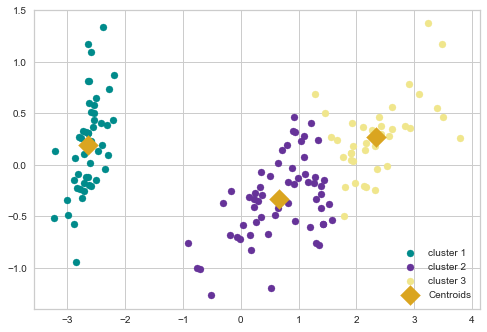

In [41]:
# Fit and make 3 clusters 
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(X_pca2)

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Visualize clusters
plt.scatter(X_pca2[kmeans_clusters == 0, 0], X_pca2[kmeans_clusters == 0, 1], 
            color='darkcyan', label='cluster 1')

plt.scatter(X_pca2[kmeans_clusters == 1, 0], X_pca2[kmeans_clusters == 1, 1], 
            color='rebeccapurple', label='cluster 2')

plt.scatter(X_pca2[kmeans_clusters == 2, 0], X_pca2[kmeans_clusters == 2, 1], 
            color='khaki', label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
plt.legend()
plt.show()

### Visualize the 2 PCA with species

#### Visualise the PCA with spiecies

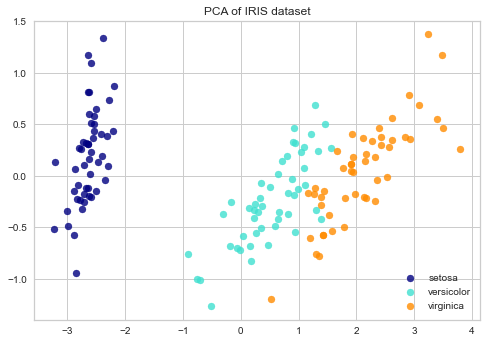

In [36]:
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca2[iris.target == i, 0], X_pca2[iris.target == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()